# Loading and Stuff

## Login

Load environment variable from .env file with python-dotenv package.

In [1]:
import os
from dotenv import load_dotenv # add this line

load_dotenv() # add this line

arcgis_user = os.getenv("ARCGIS_USER")
arcgis_pass = os.getenv("ARCGIS_PASS")
arcgis_portal = os.getenv("ARCGIS_PORTAL")

Make a GIS object, also logging into Arcgis.

In [2]:
from arcgis.gis import GIS
gis = GIS(arcgis_portal, arcgis_user, arcgis_pass)
gis

GIS @ https://pcovidjatim.maps.arcgis.com version:8.1

## Show Maps

View map of "Jawa Timur", with zoom level 8.

In [3]:
map = gis.map("Jawa Timur", zoomlevel=8)
map

MapView(layout=Layout(height='400px', width='100%'))

Webmap. Idk what this is and don't have better example for now. TODO, I guess?
Also it must be a web map. I couldn't load "89317135739f4246bdbe16816cb38f82" because it was a feature layer.

In [4]:
from arcgis.mapping import WebMap
webmap_item = gis.content.get("ab42b088573d4253a22a8b38ee698ccd")
webmap = WebMap(webmap_item)
webmap

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

## User Data

Get user data of your gis. 

In [5]:
user = gis.users.get('prediksicovidjatim')
user

<User username:prediksicovidjatim>

In [6]:
user.firstName

'Prediksi Covid'

## Searching Published Contents

GIS also provides content search interface.

<Item title:"Informasi_Rumah_Sakit_Rujukkan_Covid_19" type:Feature Layer Collection owner:mridhadamanik>
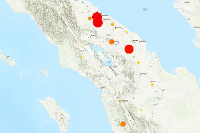

<Item title:"HOSPITAL_SERVICE_AREA_COVID" type:Feature Layer Collection owner:Muhammad_Helmi>
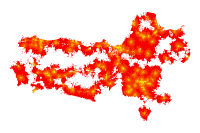

<Item title:"Data_Harian_rumah_sakit" type:Feature Layer Collection owner:Muhammad_Helmi>

<Item title:"Jangkauan_Rumah_Sakit" type:Feature Layer Collection owner:Muhammad_Helmi>
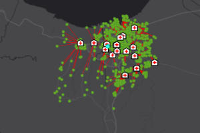

In [7]:
#https://developers.arcgis.com/python/guide/using-the-api/
from IPython.display import display

items = gis.content.search('Rumah Sakit Covid', item_type="Feature Layer", outside_org=True)
for item in items[:4]:
    display(item)

## Adding Layer to Map

You can also add the contents to your map.
I added all four of them and now it's messy as hell, haha.

In [8]:
for item in items[:4]:
    map.add_layer(item)
map

MapView(layout=Layout(height='400px', width='100%'))

## Web Map

Let's try loading webmaps found from content search.

<Item title:"RS Rujukan COVID19 Indonesia" type:Web Map owner:pid2019>
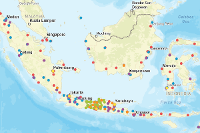

<Item title:"Latihan Geocoding" type:Web Map owner:Akhmad_Barizil_LearnArcGIS>
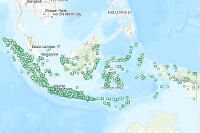

<Item title:"Peta Covid-19 Kabupaten Magelang" type:Web Map owner:nrriandika>
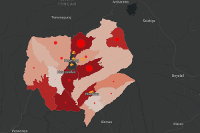

<Item title:"Peta Covid-19 Kabupaten Magelang-Copy" type:Web Map owner:nrriandika>
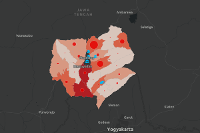

In [9]:
#https://developers.arcgis.com/python/guide/using-the-api/
from IPython.display import display

webmap_items = gis.content.search('Rumah Sakit Covid', item_type="Web Map", outside_org=True)
for wi in webmap_items[:4]:
    display(wi)

Item 3 looks cool so let's load that one. Let's try using the id because that's how the example was.

In [10]:
webmap_items[3].id

'e8589154c91545e9bdce0f1d508eee6f'

In [11]:
from arcgis.mapping import WebMap
webmap_item = gis.content.get(webmap_items[3].id)
webmap = WebMap(webmap_item)
webmap

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

Let's try using the item found by content search instead.

In [12]:
webmap_item = webmap_items[3]
webmap = WebMap(webmap_item)
webmap

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))